In [4]:
import pandas as pd
import numpy as np
# Reload the raw dataset to start fresh
df = pd.read_csv('../data/togo-dapaong_qc.csv')

print("First 10 rows of raw data:")
print(df[['GHI', 'DNI', 'DHI']].head(10))

print("\nRandom sample of 10 rows:")
print(df[['GHI', 'DNI', 'DHI']].sample(10))

# Check how many rows have negative values for each column
for col in ['GHI', 'DNI', 'DHI']:
    negative_count = len(df[df[col] < 0])
    print(f"Number of rows with {col} < 0: {negative_count} ({negative_count / len(df) * 100:.2f}%)")

First 10 rows of raw data:
   GHI  DNI  DHI
0 -1.3  0.0  0.0
1 -1.3  0.0  0.0
2 -1.3  0.0  0.0
3 -1.2  0.0  0.0
4 -1.2  0.0  0.0
5 -1.2  0.0  0.0
6 -1.1  0.0  0.0
7 -1.1  0.0  0.0
8 -1.1  0.0  0.0
9 -1.1  0.0  0.0

Random sample of 10 rows:
          GHI    DNI    DHI
185364  129.9    9.0  129.8
239393    2.0    0.0    1.8
469478   -0.6    0.0    0.0
357968  375.8    0.0  372.1
96273    -4.7    0.0    0.0
512734   -1.8    0.0    0.0
244908   -1.2    0.0    0.0
479526   -1.4    0.0    0.0
303015  279.9    0.0  279.7
19426   908.0  802.8  195.4
Number of rows with GHI < 0: 257385 (48.97%)
Number of rows with DNI < 0: 0 (0.00%)
Number of rows with DHI < 0: 0 (0.00%)


In [5]:
# How many rows do we actually have?
print("Data shape:", df.shape)

# Show summary of selected columns
print(df[['GHI', 'DNI', 'DHI', 'Tamb', 'WS']].describe())

Data shape: (525600, 19)
                 GHI            DNI            DHI           Tamb  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      230.555040     151.258469     116.444352      27.751788   
std       322.532347     250.956962     156.520714       4.758023   
min       -12.700000       0.000000       0.000000      14.900000   
25%        -2.200000       0.000000       0.000000      24.200000   
50%         2.100000       0.000000       2.500000      27.200000   
75%       442.400000     246.400000     215.700000      31.100000   
max      1424.000000    1004.500000     805.700000      41.400000   

                  WS  
count  525600.000000  
mean        2.368093  
std         1.462668  
min         0.000000  
25%         1.400000  
50%         2.200000  
75%         3.200000  
max        16.100000  


In [6]:
# Summary statistics of all numeric columns
summary_stats = df.describe()
display(summary_stats)

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
std,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN
min,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN


In [7]:
# Missing values count per column
missing_values = df.isna().sum()
display(missing_values)

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [9]:
# Columns with more than 5% missing values
missing_percent = (missing_values / len(df)) * 100
cols_over_5pct_null = missing_percent[missing_percent > 5]
print("Columns with >5% missing values:")
print(cols_over_5pct_null)

Columns with >5% missing values:
Comments    100.0
dtype: float64


In [10]:
# Drop columns with more than 5% missing values
df = df.drop(columns=["Comments"])

In [11]:
irr_cols = ['GHI', 'DNI', 'DHI']
for col in irr_cols:
    df[col] = df[col].clip(lower=0)  # Set negative values to 0
    print(f"After clipping, number of rows with {col} < 0: {len(df[df[col] < 0])}")

After clipping, number of rows with GHI < 0: 0
After clipping, number of rows with DNI < 0: 0
After clipping, number of rows with DHI < 0: 0


In [12]:
#Convert Timestamp to datetime and set as index
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df.set_index('Timestamp')

  Using cached matplotlib-3.10.3-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached contourpy-1.3.2-cp312-cp312-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.58.0-cp312-cp312-win_amd64.whl.metadata (106 kB)
  Using cached kiwisolver-1.4.8-cp312-cp312-win_amd64.whl.metadata (6.3 kB)
  Using cached pillow-11.2.1-cp312-cp312-win_amd64.whl.metadata (9.1 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.3-cp312-cp312-win_amd64.whl (8.1 MB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached contourpy-1.3.2-cp312-cp312-win_amd64.whl (223 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.58.0-cp312-cp312-win_amd64.whl (2.2 MB)
Using cached kiwisolver-1.4.8-cp312-cp312-win_amd64.whl (71 kB)
Using cached pillow-11.2.1-cp312-cp312-win_amd64.whl (2.7 MB)
U


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


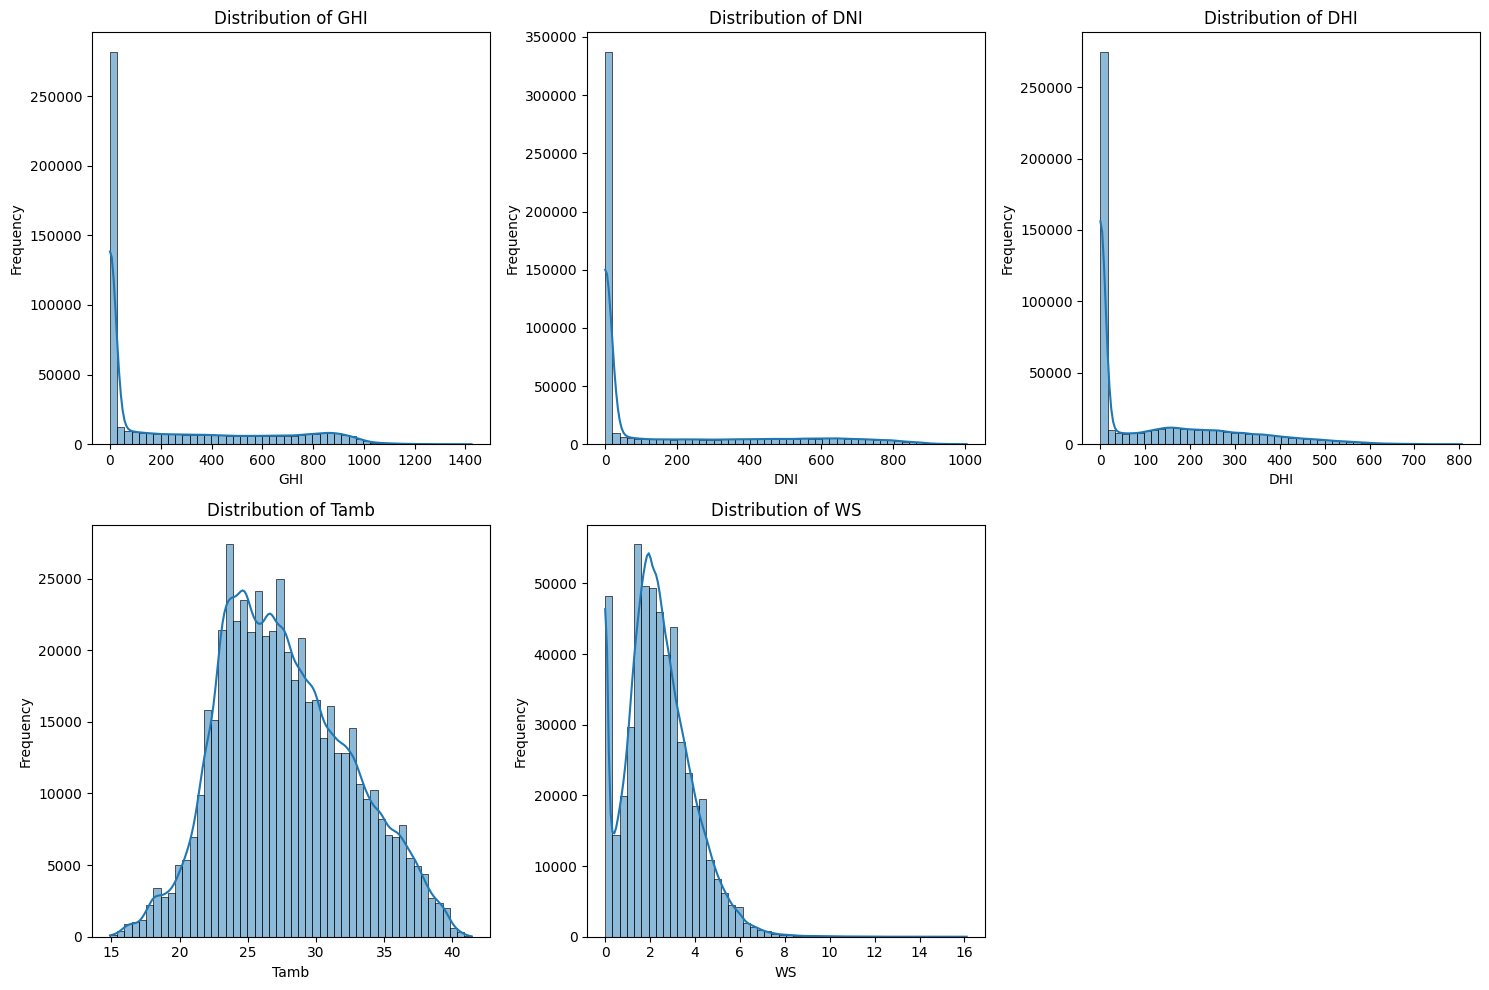

In [14]:
%pip install matplotlib seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Set up a grid for plots
cols_to_check = ['GHI', 'DNI', 'DHI', 'Tamb', 'WS']
plt.figure(figsize=(15, 10))

for i, col in enumerate(cols_to_check):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
# Next Step: Outlier Detection & Basic Cleaning (Detailed)
# Objective: Detect outliers using Z-scores (|Z| > 3) and handle them (e.g., impute with median), as specified in Task 2. Since the negative values are already addressed, we’ll focus on extreme positive values.

# Plan:

# Compute Z-scores for GHI, DNI, DHI, ModA, ModB, WS, and WSgust.
# Flag rows with |Z| > 3 as outliers.
# Impute outliers with the median value of each column.

In [15]:
%pip install scipy
from scipy import stats
# Define key columns for outlier detection
key_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Detect and handle outliers using Z-scores
for col in key_cols:
    if col in df.columns:
        # Calculate Z-scores, ignoring NaN
        z_scores = stats.zscore(df[col].dropna())
        # Create a mask for outliers (|Z| > 3)
        outlier_mask = abs(z_scores) > 3
        # Get the original indices of outliers
        outlier_indices = df.index[np.where(outlier_mask)[0]]
        print(f"Number of outliers for {col}: {len(outlier_indices)}")
        # Impute outliers with the median (only for non-NaN values)
        df.loc[outlier_indices, col] = df[col].median()

# Verify the shape and summary statistics after outlier handling
print("\nData shape after outlier handling:", df.shape)
print("\nSummary Statistics after outlier handling:")
print(df[['GHI', 'DNI', 'DHI', 'Tamb', 'WS']].describe())


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached scipy-1.15.3-cp312-cp312-win_amd64.whl.metadata (60 kB)
Using cached scipy-1.15.3-cp312-cp312-win_amd64.whl (41.0 MB)
Note: you may need to restart the kernel to use updated packages.
Number of outliers for GHI: 314
Number of outliers for DNI: 1062
Number of outliers for DHI: 3415
Number of outliers for ModA: 137
Number of outliers for ModB: 206
Number of outliers for WS: 3510
Number of outliers for WSgust: 3915

Data shape after outlier handling: (525600, 17)

Summary Statistics after outlier handling:
                 GHI            DNI            DHI           Tamb  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      230.975210     149.368966     112.408673      27.751788   
std       320.780107     248.554496     151.292938       4.758023   
min         0.000000       0.000000       0.000000      14.900000   
25%         0.000000       0.000000       0.000000      24.200000   
50%         2.100000       0.000000       2.500000      27.200

In [ ]:
# Next Step: Time Series Analysis
# Objective: Perform time series analysis on GHI, DNI, DHI, and Tamb to observe patterns (e.g., monthly, daily trends, anomalies), as specified in Task 2.

# Plan:

# Plot line charts for GHI, DNI, DHI, and Tamb over time.
# Analyze patterns by month and hour.
# Identify anomalies (e.g., unexpected peaks in GHI).

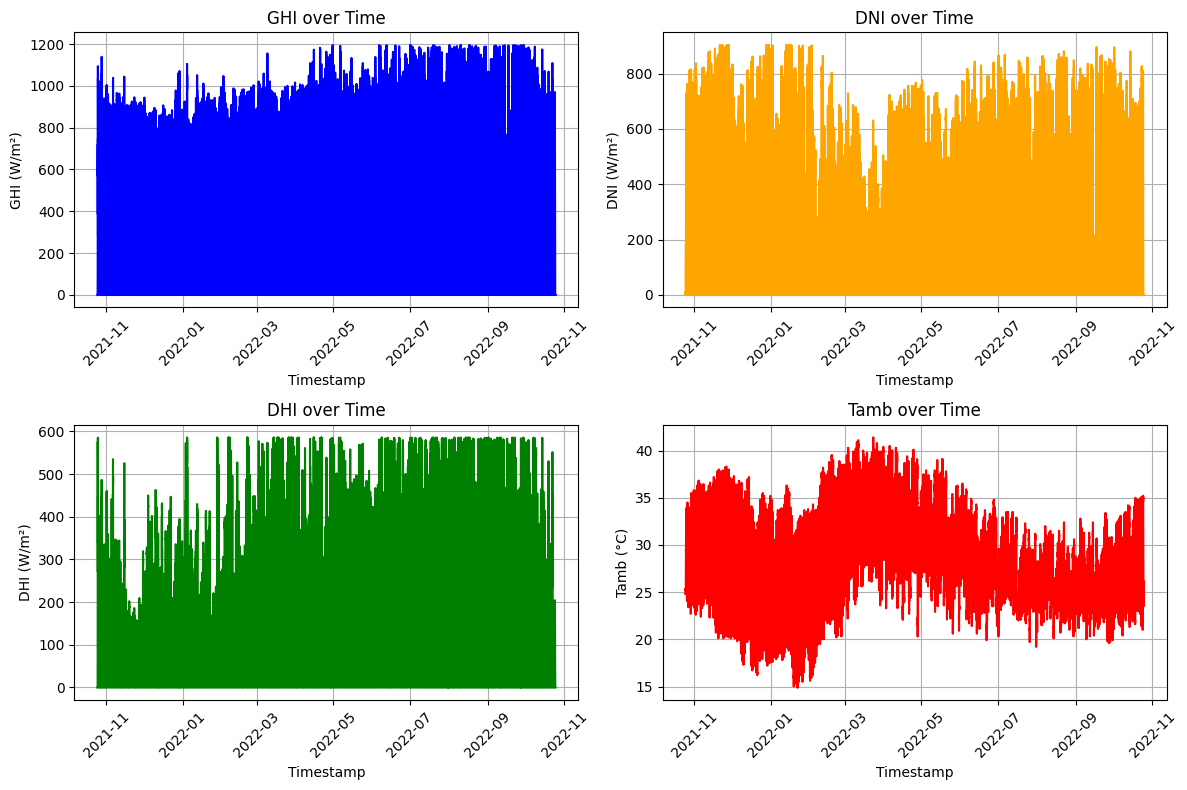

In [16]:

# Plot line charts for GHI, DNI, DHI, and Tamb over time
plt.figure(figsize=(12, 8))

# Plot GHI
plt.subplot(2, 2, 1)
plt.plot(df.index, df['GHI'], label='GHI', color='blue')
plt.title('GHI over Time')
plt.xlabel('Timestamp')
plt.ylabel('GHI (W/m²)')
plt.xticks(rotation=45)
plt.grid(True)

# Plot DNI
plt.subplot(2, 2, 2)
plt.plot(df.index, df['DNI'], label='DNI', color='orange')
plt.title('DNI over Time')
plt.xlabel('Timestamp')
plt.ylabel('DNI (W/m²)')
plt.xticks(rotation=45)
plt.grid(True)

# Plot DHI
plt.subplot(2, 2, 3)
plt.plot(df.index, df['DHI'], label='DHI', color='green')
plt.title('DHI over Time')
plt.xlabel('Timestamp')
plt.ylabel('DHI (W/m²)')
plt.xticks(rotation=45)
plt.grid(True)

# Plot Tamb
plt.subplot(2, 2, 4)
plt.plot(df.index, df['Tamb'], label='Tamb', color='red')
plt.title('Tamb over Time')
plt.xlabel('Timestamp')
plt.ylabel('Tamb (°C)')
plt.xticks(rotation=45)
plt.grid(True)

# Adjust layout to avoid overlap
plt.tight_layout()
plt.savefig('timeseries_plots.png')
plt.show()

In [17]:
# Analyze patterns by month
monthly_avg = df.groupby(df.index.month)[['GHI', 'DNI', 'DHI', 'Tamb']].mean()
print("Monthly Averages:\n", monthly_avg)

Monthly Averages:
                   GHI         DNI         DHI       Tamb
Timestamp                                               
1          240.316116  210.964579   89.120634  25.132681
2          259.573299  166.348976  124.655236  28.268621
3          253.633255  114.931635  143.935925  32.511519
4          252.521641  143.576257  126.269021  30.888090
5          239.091983  129.297993  127.172959  29.719371
6          237.849597  133.510521  122.169046  27.732884
7          202.647890   94.875930  119.626142  26.264928
8          186.600459   81.059830  117.287970  25.294935
9          175.575053   83.204699  106.649729  24.970475
10         246.269037  177.898873  107.797724  27.142251
11         246.782329  248.612176   75.008317  28.900421
12         233.249021  210.157988   89.766243  26.293190


In [18]:
# Analyze patterns by hour of the day
hourly_avg = df.groupby(df.index.hour)[['GHI', 'DNI', 'DHI']].mean()
print("\nHourly Averages:\n", hourly_avg)

# Look for anomalies (e.g., GHI spikes)
ghi_spikes = df[df['GHI'] > df['GHI'].quantile(0.99)]  # Top 1% of GHI values
print("\nPotential GHI Anomalies (Spikes):\n", ghi_spikes[['GHI']])


Hourly Averages:
                   GHI         DNI         DHI
Timestamp                                    
0            0.000297    0.000000    0.000000
1            0.000142    0.000000    0.000000
2            0.000260    0.000000    0.000000
3            0.000553    0.000000    0.000000
4            0.001822    0.000000    0.000000
5            1.179877    0.300146    1.128315
6           53.181653   42.047489   43.532808
7          211.594511  181.295352  137.776311
8          409.281333  307.181324  223.985174
9          589.550388  390.152511  289.978858
10         715.526489  424.860114  320.562443
11         776.985301  435.213014  326.646767
12         771.925507  441.460037  324.786909
13         718.044493  429.353169  320.299087
14         603.349813  399.701548  293.023137
15         420.818068  313.474553  228.199324
16         216.198804  180.806817  140.855900
17          54.362635   38.613123   45.469315
18           1.394521    0.395986    1.563799
19           0.

In [ ]:
# Next Step: Cleaning Impact Analysis
# Objective: Analyze the impact of the Cleaning flag on ModA and ModB, as specified in Task 2. This involves grouping the data by the Cleaning column, calculating the mean of ModA and ModB before and after cleaning, and visualizing the results with a bar plot.

# Plan:

# Group the data by the Cleaning flag.
# Compute the mean of ModA and ModB for each group (pre- and post-cleaning).
# Plot a bar chart to compare the averages.

Average ModA and ModB by Cleaning Flag:
                 ModA        ModB
Cleaning                        
0         225.661641  218.936900
1         535.186477  532.211744


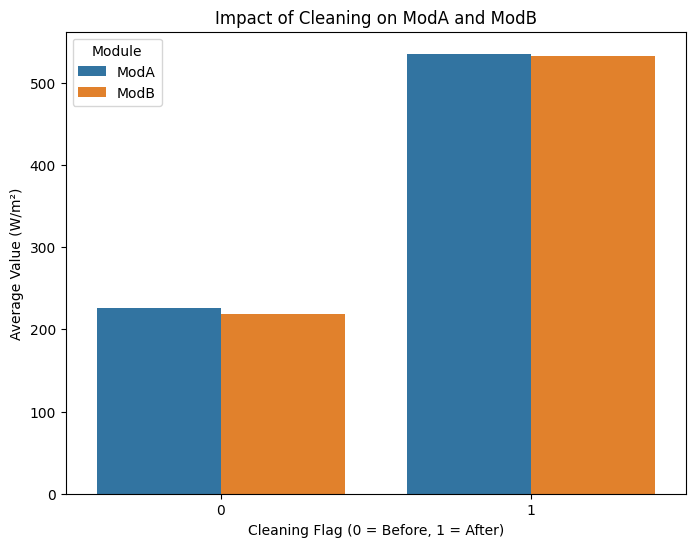

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by Cleaning flag and calculate mean for ModA and ModB
cleaning_impact = df.groupby('Cleaning')[['ModA', 'ModB']].mean()
print("Average ModA and ModB by Cleaning Flag:\n", cleaning_impact)

# Plot the impact of cleaning on ModA and ModB
cleaning_impact_melted = cleaning_impact.reset_index().melt(id_vars='Cleaning', value_vars=['ModA', 'ModB'], var_name='Module', value_name='Value')
plt.figure(figsize=(8, 6))
sns.barplot(x='Cleaning', y='Value', hue='Module', data=cleaning_impact_melted)
plt.title('Impact of Cleaning on ModA and ModB')
plt.xlabel('Cleaning Flag (0 = Before, 1 = After)')
plt.ylabel('Average Value (W/m²)')
plt.savefig('cleaning_impact_plot.png')
plt.show()

In [ ]:
#Next Step: Correlation Analysis
# Objective: Compute the correlation matrix for GHI, DNI, DHI, Tamb, WS, ModA, and ModB to identify relationships, as specified in Task 2. Visualize the correlations using a heatmap.

# Plan:

# Calculate the Pearson correlation matrix for the specified columns.
# Create a heatmap to visualize the correlations.

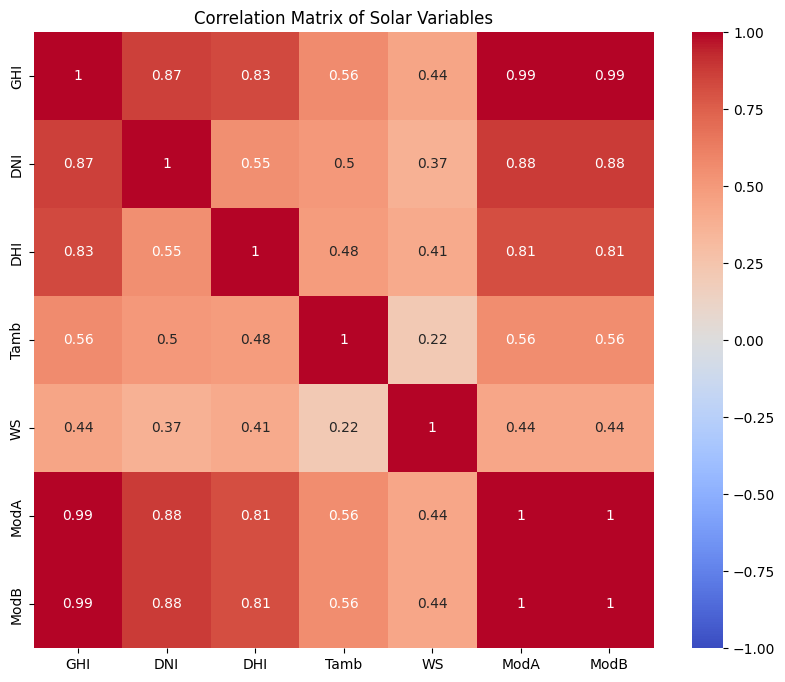

Correlation Matrix:
            GHI       DNI       DHI      Tamb        WS      ModA      ModB
GHI   1.000000  0.867092  0.829833  0.563291  0.438599  0.992615  0.993254
DNI   0.867092  1.000000  0.549749  0.501879  0.370365  0.879232  0.878420
DHI   0.829833  0.549749  1.000000  0.484446  0.407090  0.813609  0.813404
Tamb  0.563291  0.501879  0.484446  1.000000  0.216673  0.561525  0.556723
WS    0.438599  0.370365  0.407090  0.216673  1.000000  0.436255  0.437453
ModA  0.992615  0.879232  0.813609  0.561525  0.436255  1.000000  0.998679
ModB  0.993254  0.878420  0.813404  0.556723  0.437453  0.998679  1.000000


In [20]:
# Select columns for correlation analysis
correlation_cols = ['GHI', 'DNI', 'DHI', 'Tamb', 'WS', 'ModA', 'ModB']

# Compute correlation matrix
correlation_matrix = df[correlation_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix of Solar Variables')
plt.savefig('correlation_heatmap.png')
plt.show()

print("Correlation Matrix:\n", correlation_matrix)

In [ ]:
# Next Step: Wind Rose Plot
# Objective: Create a wind rose or radial bar plot to visualize the distribution of wind speed (WS) and wind direction (WD), as specified in Task 2.

# Plan:

# Use the windrose library to plot WS against WD.
# Ensure WD is in degrees (0–360) and WS is in m/s.

  Using cached windrose-1.9.2-py3-none-any.whl.metadata (5.2 kB)
Using cached windrose-1.9.2-py3-none-any.whl (20 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


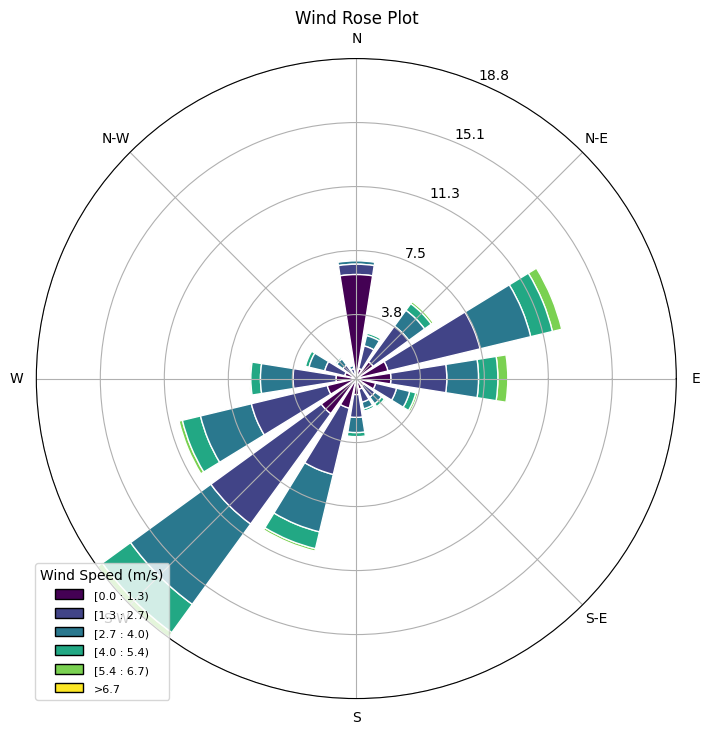

In [21]:
%pip install windrose
from windrose import WindroseAxes
import matplotlib.pyplot as plt
import os

# Create wind rose plot
fig = plt.figure(figsize=(8, 8))
ax = WindroseAxes.from_ax(fig=fig)
ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend(title="Wind Speed (m/s)")
plt.title('Wind Rose Plot')

# Create notebooks directory if it doesn't exist
os.makedirs('notebooks', exist_ok=True)
plt.savefig('wind_rose_plot.png')
plt.show()

In [25]:
# Save the cleaned DataFrame to a CSV file
df.to_csv('../data/togo_cleaned.csv', index=True)
print("Cleaned dataset saved to 'data/benin_cleaned.csv'")

Cleaned dataset saved to 'data/benin_cleaned.csv'
